# HW1
## TODO:  Your ID goes here:

#### TODO: You emails for here:

## Introduction
This is the first Deep Learning assignment of the course.
It is divided into three sections:
1. Toy classification tasks (50 pts.)
2. Toy regressions tasks (30 pts.)
3. MNIST (binary) classification task (20 pts.)

See the instructions before each section.
You are not required to normalize the data in sections 1 and 2.

## Submission
The deadline for the task is 12.12.2024 end of day.
You may work in teams of 2 or 3.

Submission is via Moodle. Submit the **already run** notebook (i.e., with its output, figures, etc.,).

#Section 1: Classification Tasks
## TODO
For the entire section, do the following (i.e., only once):
1. Write a training function that returns the trained model and training loss
2. Write a plotting function to plot the training loss
3. Write a plotting function that scatter plots the predicted labels and decision boundaries.
4. Write a preprocessing function to handle the data (convert to pytorch tensor, etc).
5. Write an evaluation function that prints the set accuracy (train/test)

For each of the 5 exercises, do the following:
1. Create either a linear classifier if the problem seems linearly separable or an MLP using PyTorch. Explain your choice.
2. Train the model and plot the loss across epochs.
3. Plot the predicted labels and decision boundaries for the train set. Show the accuracy in the title (up to 3 decimals points).
4. Plot the predicted labels and decision boundaries for the test set.  Show the accuracy in the title (up to 3 decimals points).
5. Do NOT change the random seed of the data generation functions.
6. Create a Markdown cell and explain briefly (2-3 lines): why did the model perform well/poorly? What affected your design choices? What did you learn from previous attempts?


EX5 has further instructions.

## Grading:
**Accuracy** computed on the test set:
1. 80-100%: 10 pts (full grade)
2. 70-80%: 8pts
3. 60-70%: 6pts
4. < 60%: 5pts

You will also be graded on the correctness of your code and the discussion that follows each excersice.



## Setup
## DO NOT MODIFY THESE FUNCTIONS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D


In [2]:
### EX1
def random_points_in_triangle(v1, v2, v3, n_points):
    points = []
    for _ in range(n_points):
        r1, r2 = np.random.rand(2)
        sqrt_r1 = np.sqrt(r1)
        point = (1 - sqrt_r1) * v1 + sqrt_r1 * (1 - r2) * v2 + sqrt_r1 * r2 * v3
        points.append(point)
    return np.array(points)

def generate_symmetric_triangles_data(K=3, N=100, random_state=42):
    np.random.seed(random_state)
    # Define vertices for three symmetric triangles
    side_length = 2
    height = np.sqrt(3) * side_length / 2
    triangles = [
        (np.array([0, 0]), np.array([side_length, 0]), np.array([side_length / 2, height])),
        (np.array([0, 0]), np.array([-side_length, 0]), np.array([-side_length / 2, height])),
        (np.array([0, 0]), np.array([1.5, -height]), np.array([-1.5, -height]))
    ]

    X, y = [], []
    for i, (v1, v2, v3) in enumerate(triangles):
        points = random_points_in_triangle(v1, v2, v3, N)
        X.append(points)
        y += [i] * N

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX2
def generate_grid_data(grid_size=4, min_points=5, max_points=20, random_state=42):
    np.random.seed(random_state)
    X, y = [], []
    half_grid_size = grid_size // 2

    for i in range(grid_size):
        for j in range(grid_size):
            n_points = np.random.randint(min_points, max_points + 1)
            x_offset = i - half_grid_size + 0.5
            y_offset = j - half_grid_size + 0.5
            # Generate points more centered within the square
            points = 0.8 * (np.random.rand(n_points, 2) - 0.5) + [x_offset, y_offset]
            X.append(points)
            label = (i + j) % 2
            y += [label] * n_points

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX3
def generate_concentric_circles_data(radii=[1, 2, 3, 4], points_per_circle=100, random_state=42):
    np.random.seed(random_state)
    X, y = [], []

    for i, radius in enumerate(radii):
        angles = np.linspace(0, 2 * np.pi, points_per_circle, endpoint=False)
        circle_x = radius * np.cos(angles) + np.random.normal(0, 0.1, points_per_circle)
        circle_y = radius * np.sin(angles) + np.random.normal(0, 0.1, points_per_circle)
        X.append(np.vstack((circle_x, circle_y)).T)
        y += [i] * points_per_circle

    X = np.vstack(X)
    y = np.array(y)
    return X, y

### EX4
def generate_nested_rectangles_data(inner_rect=(2, 1), middle_rect=(4, 2), outer_rect=(6, 3), points_per_rectangle=100, random_state=42):
    np.random.seed(random_state)
    X, y = [], []

    # Inner rectangle
    width, height = inner_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    X.append(np.vstack((x_points, y_points)).T)
    y += [0] * points_per_rectangle

    # Middle rectangle
    width, height = middle_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    # Exclude points that fall inside the inner rectangle
    mask = (np.abs(x_points) > inner_rect[0] / 2) | (np.abs(y_points) > inner_rect[1] / 2)
    X.append(np.vstack((x_points[mask], y_points[mask])).T)
    y += [1] * len(x_points[mask])

    # Outer rectangle
    width, height = outer_rect
    x_points = width * (np.random.rand(points_per_rectangle) - 0.5)
    y_points = height * (np.random.rand(points_per_rectangle) - 0.5)
    # Exclude points that fall inside the middle rectangle
    mask = (np.abs(x_points) > middle_rect[0] / 2) | (np.abs(y_points) > middle_rect[1] / 2)
    X.append(np.vstack((x_points[mask], y_points[mask])).T)
    y += [2] * len(x_points[mask])

    X = np.vstack(X)
    y = np.array(y)
    return X, y


def plot_data(X, y, title=""):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=set(y), title="Classes")
    plt.show()



# TODO - your general functions for Section 1

In [3]:
### Your code goes here (you may break this part to more than one cell) ####
### Imports
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch import nn, optim
### Preprocessing function ####
device = "cuda"
def preprocess(X, y):
  X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
  y_tensor = torch.tensor(y, dtype=torch.long).to(device)
  return X_tensor, y_tensor


### Training function ###

def train_model(model, X, y, optimizer, criterion, num_epochs=1000):
  model.train()
  loss_list = []
  for epoch in tqdm(range(num_epochs)):
    # no batches, predict the entire set
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    y_pred = model(X).squeeze()
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
  return loss_list[:num_epochs]

### Plot training loss function ###

def plot_loss(loss, title="Training Loss"):
  plt.plot(loss)
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.grid()
  plt.show()

### Plot predicted labels and decision boundaries ###
def plotPredictionsAndBoundaries(model, X_train, y, lim):
  y = y.cpu().numpy()
  lim_axis = 6
  xs = torch.linspace(-lim_axis, lim_axis, steps=500)
  ys = torch.linspace(-lim_axis, lim_axis, steps=500)
  xx_m, yy_m = torch.meshgrid(xs, ys, indexing='xy')
  xx, yy = xx_m.ravel(), yy_m.ravel()
  xy_coord = torch.stack([xx, yy], dim=1)
  xx_m, yy_m = xx_m.numpy(), yy_m.numpy()
  y_pred = model(X_train).detach().cpu().numpy()
  y_pred = np.argmax(y_pred, axis=1)
  print("Softmax classifier train accruacy:", np.mean(y_pred == y))
  # lets visualize the data:
  decision_bound = model(xy_coord.to(device)).detach().cpu().numpy()
  decision_bound = np.argmax(decision_bound, axis=1)
  plt.scatter(xx_m, yy_m, c=decision_bound, cmap='viridis')
  plt.scatter(X_train.cpu()[:, 0], X_train.cpu()[:, 1], c=y, s=40, cmap='viridis', edgecolors='k')
  axis_lim = (-lim, lim)
  plt.xlim(axis_lim)
  plt.ylim(axis_lim)
  plt.show()
### Evaluation function ###
def eval(model, X_test, y_test):
  with torch.no_grad():
    y_test_pred = model(X_test.to(device))
    y_test_pred = y_test_pred.cpu().numpy()
    y_test_pred = np.argmax(y_test_pred, axis=1)
    X_test = X_test.cpu().numpy()
    y_test = y_test.cpu().numpy()
    plot_data(X_test, y_test, title="Colored by True labels")
    plot_data(X_test, y_test_pred, title="Colored by Predicted labels")
    print("Softmax classifier test accruacy:", np.mean(y_test_pred == y_test))


## EX1

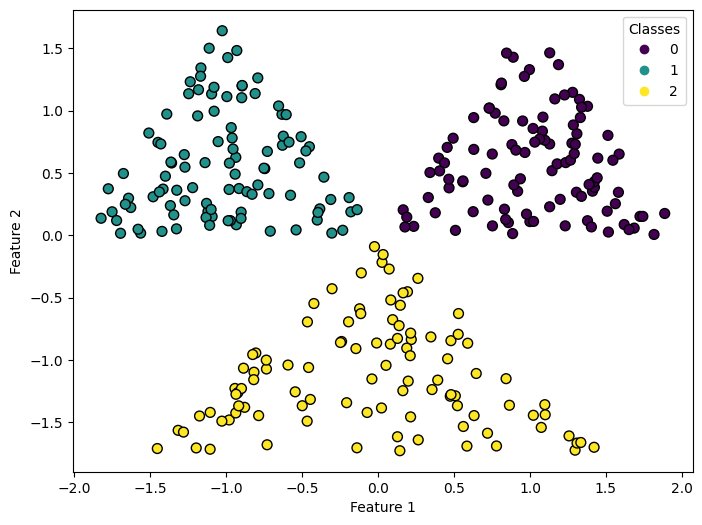

In [4]:
# Generate the data
X_train, y_train = generate_symmetric_triangles_data(random_state=0)
X_test, y_test = generate_symmetric_triangles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

100%|██████████| 1000/1000 [00:01<00:00, 894.15it/s]


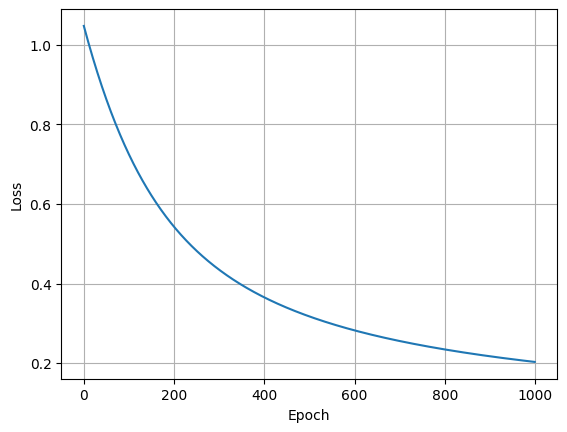

Softmax classifier train accruacy: 1.0


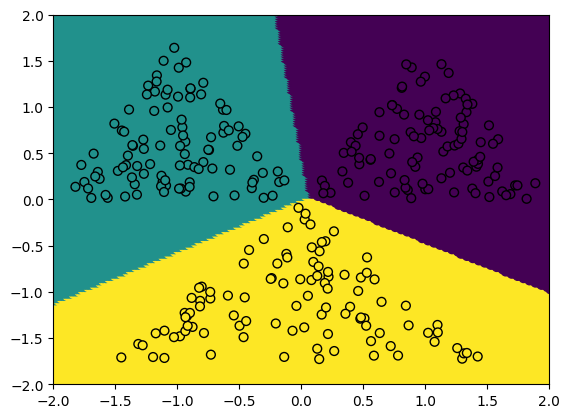

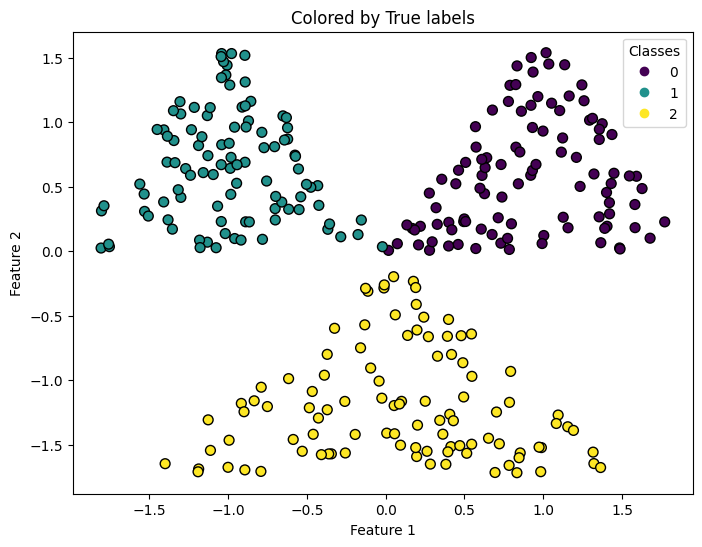

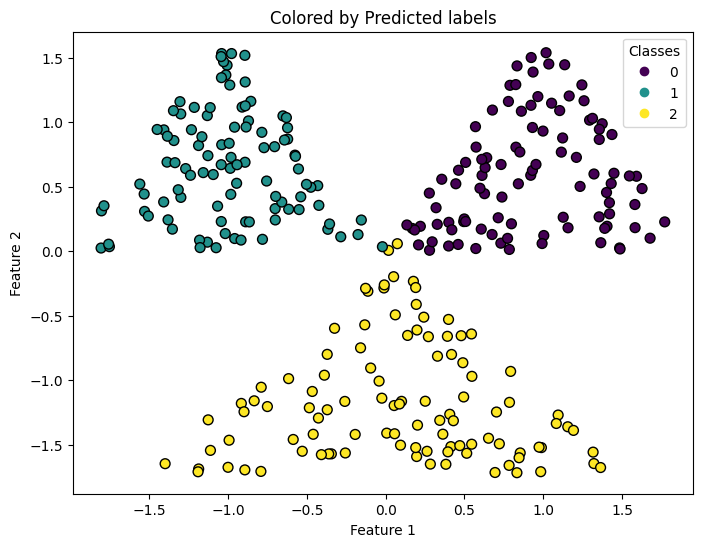

Softmax classifier test accruacy: 0.9933333333333333


In [5]:
### Your code goes here ####
X_train, y_train = preprocess(X_train, y_train)
X_test, y_test = preprocess(X_test, y_test)
criterion = nn.NLLLoss()
lr = 0.01
input_size = 2
output_size = 3
model = nn.Sequential(nn.Linear(input_size, output_size),
                      nn.LogSoftmax(dim=1)).to("cuda")
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_list = train_model(model, X_train, y_train, optimizer, criterion)
plot_loss(loss_list)
plotPredictionsAndBoundaries(model, X_train, y_train, 2)
eval(model, X_test, y_test)

**we choose lr=0.01,this learning rate is providing a good balance between stable convergence and efficient training.
this training exercise is a "easy" one ,we can see the data is spread into noticeable parts so classifying worked well with single layer.**


## EX2

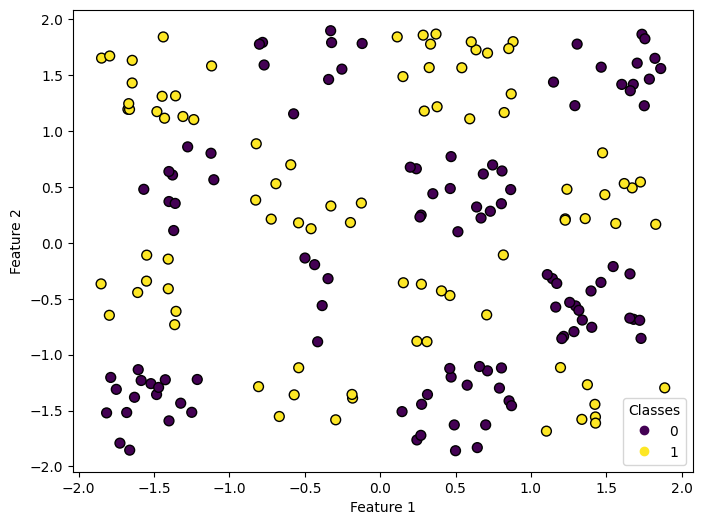

In [6]:
# Generate the data
X_train, y_train = generate_grid_data(random_state=0)
X_test, y_test = generate_grid_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

100%|██████████| 1000/1000 [00:01<00:00, 612.14it/s]


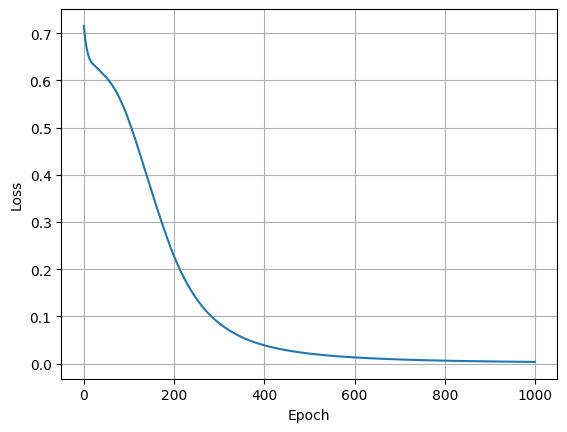

Softmax classifier train accruacy: 1.0


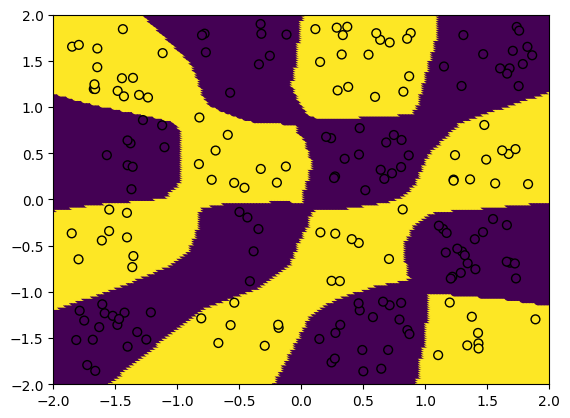

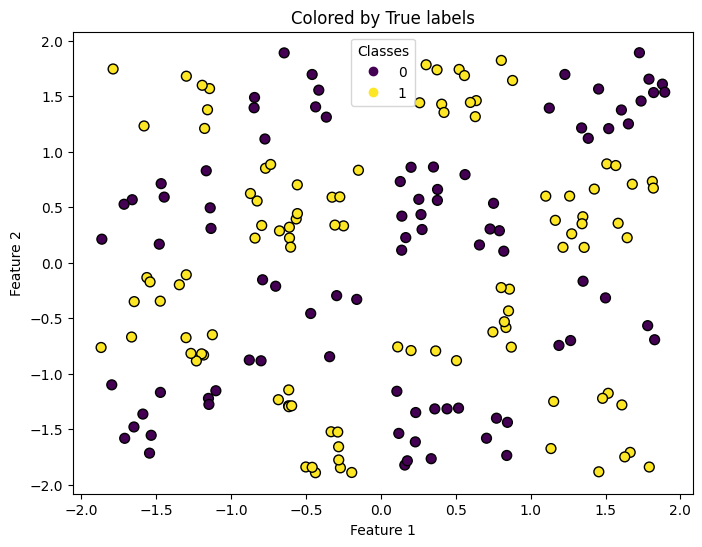

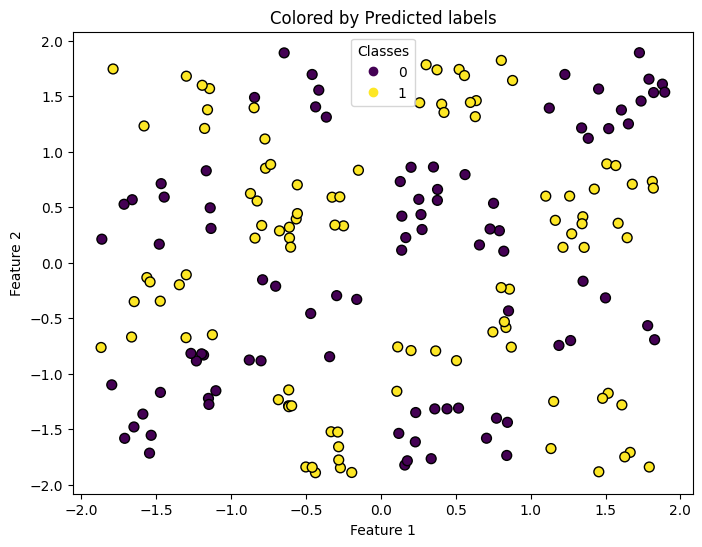

Softmax classifier test accruacy: 0.9572192513368984


In [7]:
### Your code goes here ####
X_train, y_train = preprocess(X_train, y_train)
X_test, y_test = preprocess(X_test, y_test)
criterion = nn.NLLLoss()
lr = 0.001
input_size = 2
output_size = 2
hidden_size = 64
model = nn.Sequential(nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, output_size),
                      nn.LogSoftmax(dim=1)).to("cuda")
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_list = train_model(model, X_train, y_train, optimizer, criterion)
plot_loss(loss_list)
plotPredictionsAndBoundaries(model, X_train, y_train, 2)
eval(model, X_test, y_test)

 **In this excercise we started with SGD and to improve the performence we changed the optimizer to Adam,which also led us to choose slow learning rate.
In this exercise,the data points are less seperated so we had to use more then one layer for good resaults.**

## EX3

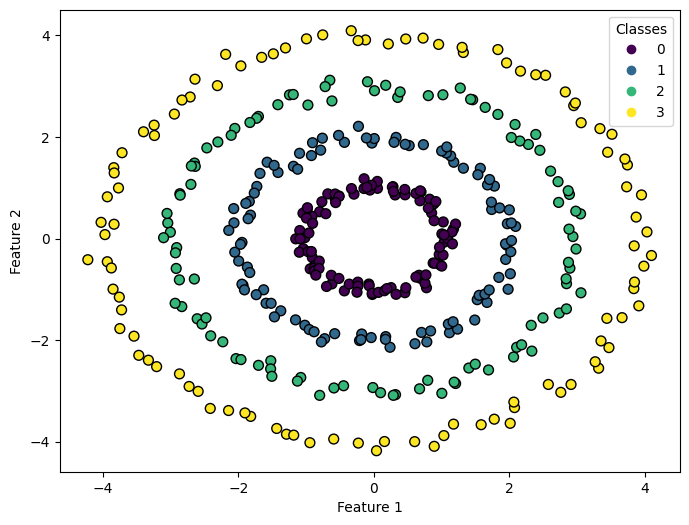

In [8]:
# Generate the data
X_train, y_train = generate_concentric_circles_data(random_state=0)
X_test, y_test = generate_concentric_circles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)


100%|██████████| 1000/1000 [00:01<00:00, 859.81it/s]


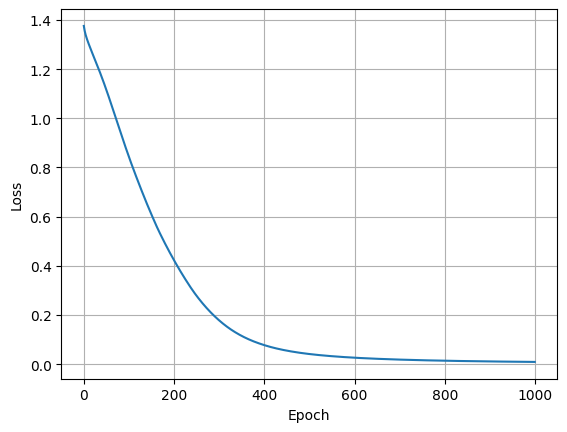

Softmax classifier train accruacy: 1.0


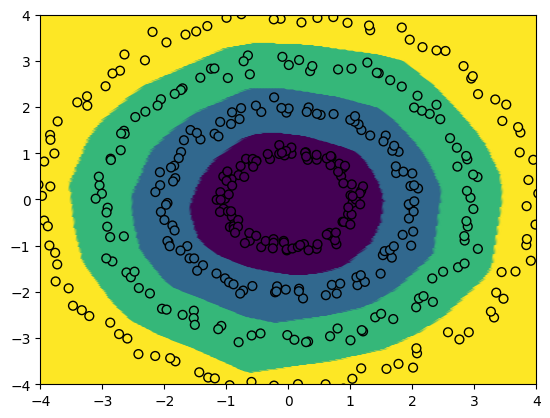

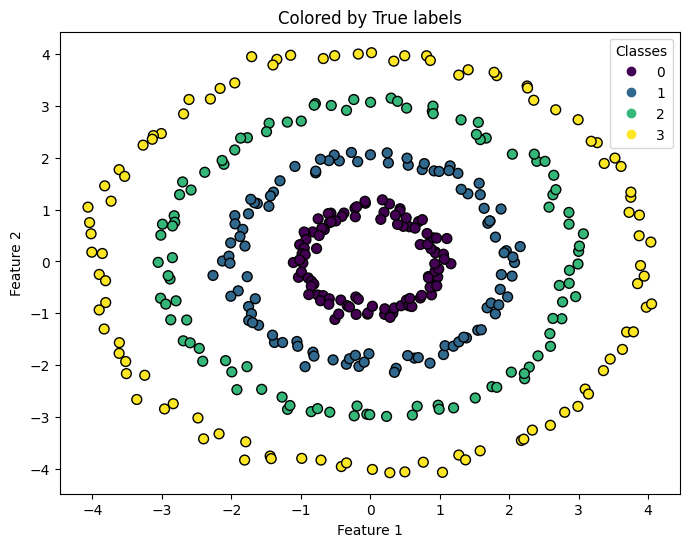

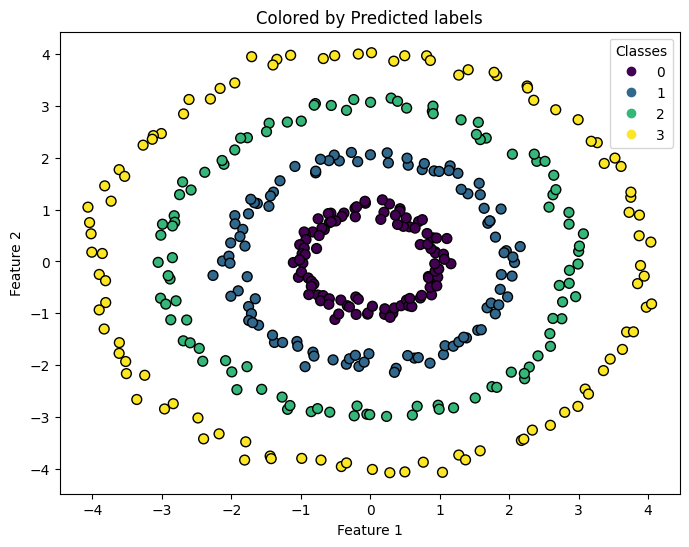

Softmax classifier test accruacy: 1.0


In [9]:
### Your code goes here ####
X_train, y_train = preprocess(X_train, y_train)
X_test, y_test = preprocess(X_test, y_test)
criterion = nn.NLLLoss()
lr = 0.1
input_size = 2
output_size = 4
hidden_size = 32
model = nn.Sequential(nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, output_size),
                      nn.LogSoftmax(dim=1)).to("cuda")
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_list = train_model(model, X_train, y_train, optimizer, criterion)
plot_loss(loss_list)
plotPredictionsAndBoundaries(model, X_train, y_train, 4)
eval(model, X_test, y_test)

**In this excercise we used SGD optimiazer that got us good resaults.
the data points have a certain structure which is learnable with less neurons than the previous one so we choose 32 instead of 64.**

## EX4

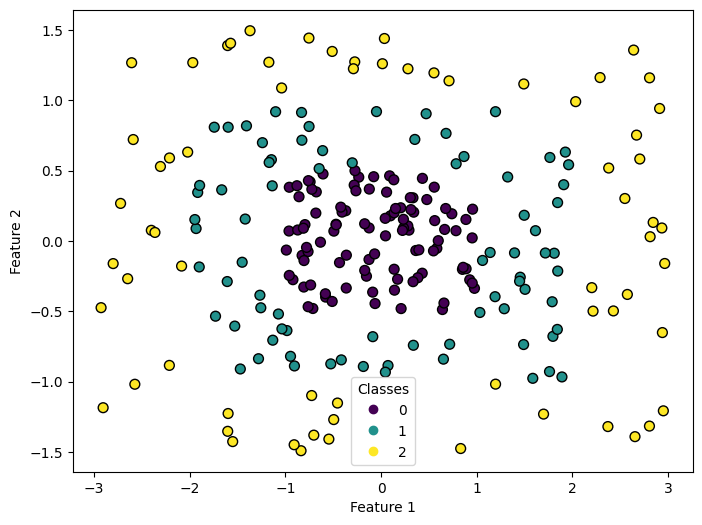

In [10]:


# Generate the data
X_train, y_train = generate_nested_rectangles_data(random_state=0)
X_test, y_test = generate_nested_rectangles_data(random_state=1)

# Plot the data
plot_data(X_train, y_train)

100%|██████████| 1000/1000 [00:01<00:00, 877.57it/s]


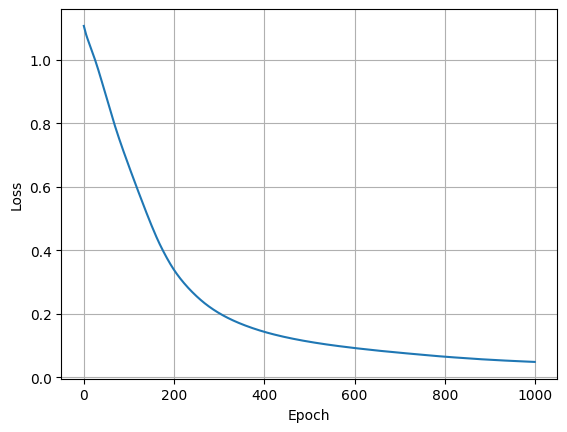

Softmax classifier train accruacy: 0.9959016393442623


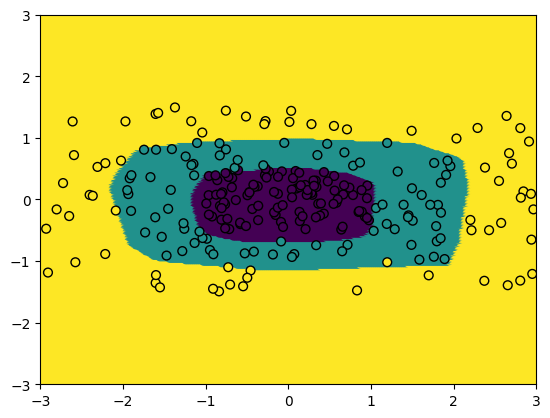

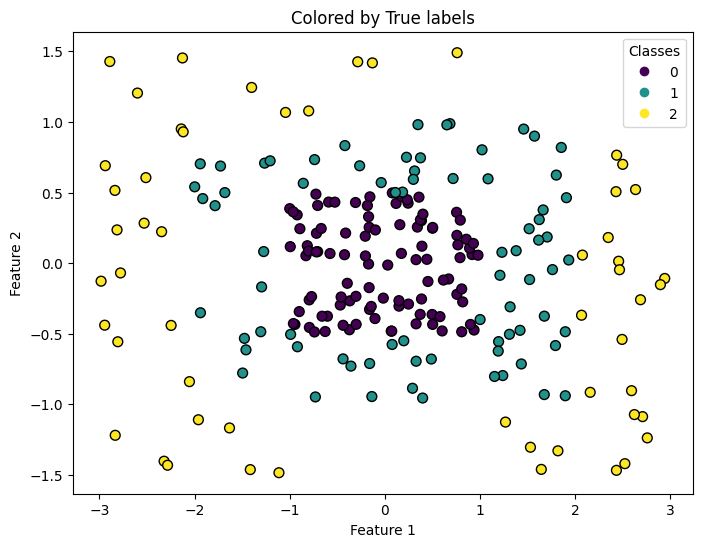

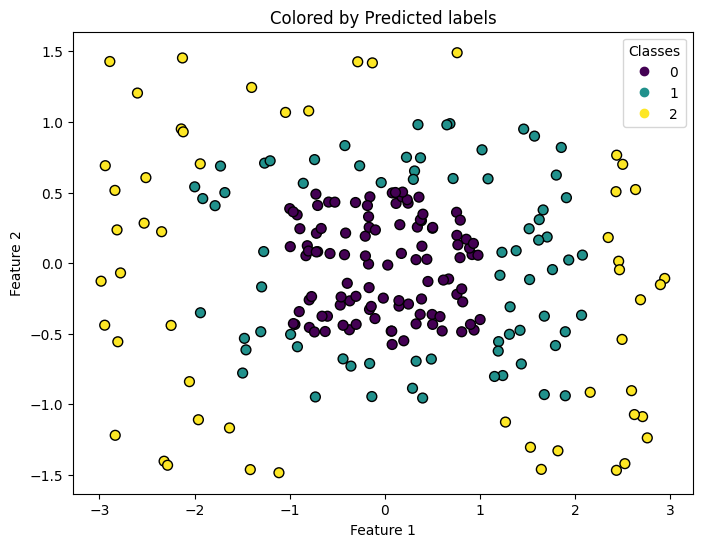

Softmax classifier test accruacy: 0.9650655021834061


In [11]:
### Your code goes here ####
X_train, y_train = preprocess(X_train, y_train)
X_test, y_test = preprocess(X_test, y_test)
criterion = nn.NLLLoss()
lr = 0.1
input_size = 2
output_size = 3
hidden_size = 32
model = nn.Sequential(nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, output_size),
                      nn.LogSoftmax(dim=1)).to("cuda")
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_list = train_model(model, X_train, y_train, optimizer, criterion)
plot_loss(loss_list)
plotPredictionsAndBoundaries(model, X_train, y_train, 3)
eval(model, X_test, y_test)


**We used the exact same model as previous exercise(with different output size)  which let us for good resaults,so we didnt change it.**

## EX5 - Mystery Dataset
Load the data from the ex5.zip file:
X_train.npy
y_train.npy
X_test.npy
y_test.npy

Figure out the input and output dims and perform the classification task as in previous exercises.

You do not have to plot the data, but you may if you see fit.

100%|██████████| 1000/1000 [00:00<00:00, 1055.62it/s]


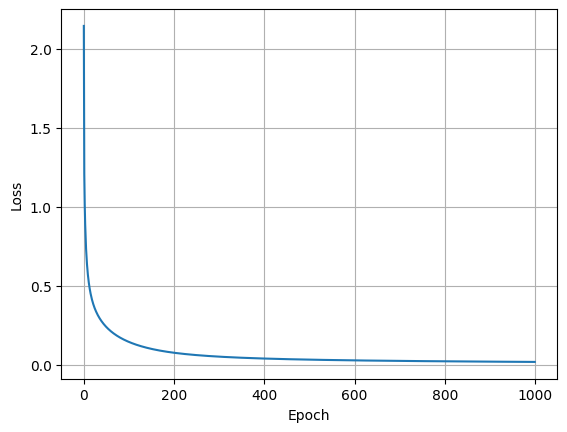

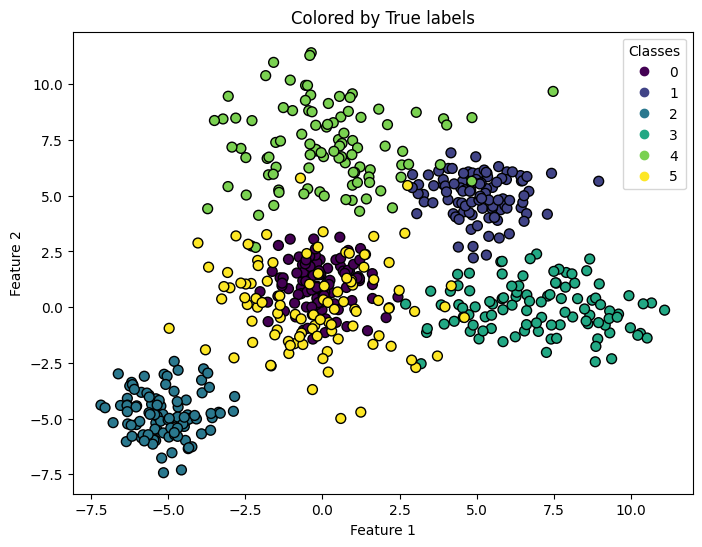

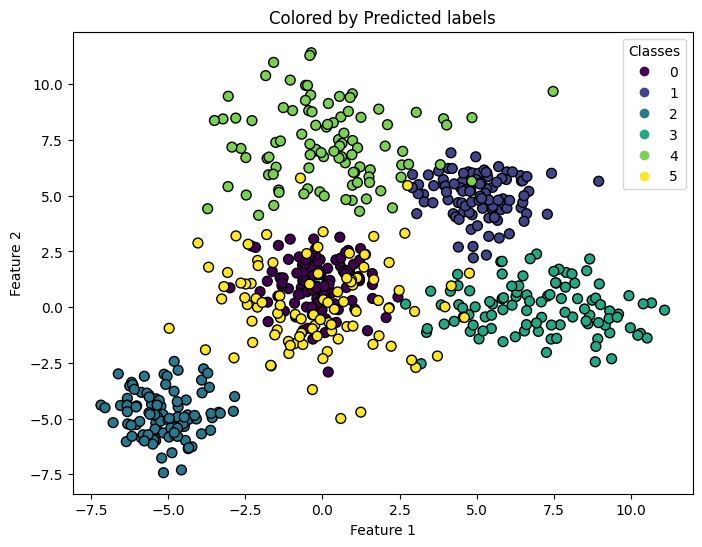

Softmax classifier test accruacy: 0.9816666666666667


In [12]:
### Your code goes here ####

## load numpy array using np.load()
X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

## Figure out the data dimensions
X_train_sampleSize = X_train.shape[0]
X_featureSize = X_train.shape[1]
X_test_sampleSize = X_test.shape[0]

output_size = len(np.unique(y_train))
## Init and train model. Report Accuracy
X_train, y_train = preprocess(X_train, y_train)
X_test, y_test = preprocess(X_test, y_test)
criterion = nn.NLLLoss()
lr = 0.1
input_size = X_featureSize
hidden_size = 32
model = nn.Sequential(nn.Linear(input_size, hidden_size),
                      nn.ReLU(),
                      nn.Linear(hidden_size, output_size),
                      nn.LogSoftmax(dim=1)).to("cuda")
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_list = train_model(model, X_train, y_train, optimizer, criterion)
plot_loss(loss_list)
eval(model, X_test, y_test)

**The model preforms well with SGD optimizer with one hidden layer,we can see that other than the yellow and the purple classes most of the points are distinct and well predicted.**

#Section 2: Regression Tasks
In this section your task is to predict the value of each point (indicated by the color in the scatter plots) using it's coordinates.
## TODO
For the entire section, do the following (i.e., only once):
1. Use the training function from previous section.
2. Use the plotting function from previous section to plot the loss.
3. Use the provided plotting function to plot the data with your predicted label values. For instance:


```
plot_s_curve(X_train, y_train_pred)
```


4. Write a preprocessing function for the inputs (convert to torch tensor, etc).
5. Write an evaluation function that prints the set Mean Square Error (train/test).

For each of the 3 exercises, do the following:
1. Create an MLP using PyTorch.
2. Train the model and plot the loss across epochs.
3. Plot the predicted values for the train set. Show the MSE in the title (up to 3 decimals points).
4. Plot the predicted values for the test set. Show the MSE in the title (up to 3 decimals points).
5. Create a Markdown cell and explain briefly (2-3 lines): why did the model perform well/poorly? What affected your design choices?

**Grading**: in this section you are only graded on the correctness of your code and discussion.

**Optional**: you may want to plot the residuals between your model prediction and the true labels. For instance, you may plot the data and use the differences between the true and predicted labels as their color.

## Setup

In [13]:
from sklearn.datasets import make_s_curve
### EX6
def generate_s_curve_data(n_samples=150, random_state=42):
    X, t = make_s_curve(n_samples, random_state=random_state)
    X = X[:, [0, 2]]  # Use only 2D input (X[:, 0] and X[:, 2])
    return X, t

def create_labels_s_curve(X, t):
    # Sort the indices based on the S-curve parameter t
    sorted_indices = np.argsort(t)
    labels = np.linspace(-1, 1, len(t))
    y = np.zeros_like(t)
    y[sorted_indices] = labels
    return y

def plot_s_curve(X, y, title='S-Curve'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter, label='Label')
    plt.show()


### EX7
def generate_spiral_data(n_points=1000, n_turns=2.5, noise=0.05, random_state=42):
    np.random.seed(random_state)
    theta = np.linspace(0, n_turns * 2 * np.pi, n_points)
    r = np.linspace(0, 1, n_points)
    x = r * np.cos(theta) + noise * np.random.randn(n_points)
    y = r * np.sin(theta) + noise * np.random.randn(n_points)
    X = np.vstack((x, y)).T
    return X, theta

def create_labels_spiral(theta):
    labels = np.linspace(-1, 1, len(theta))
    return labels

def plot_spiral(X, y, title='Spiral'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(scatter, label='Label')
    plt.show()

### EX8
def generate_spiral_data_3d(n_points=1000, n_turns=2.5, noise=0.05, random_state=42):
    np.random.seed(random_state)
    theta = np.linspace(0, n_turns * 2 * np.pi, n_points)
    z = np.linspace(0, 1, n_points)
    r = z
    x = r * np.cos(theta) + noise * np.random.randn(n_points)
    y = r * np.sin(theta) + noise * np.random.randn(n_points)
    X = np.vstack((x, y, z)).T
    return X, theta

def create_labels_3d_spiral(theta):
    labels = np.linspace(-1, 1, len(theta))
    return labels

def plot_spiral_3d(X, y, title='3D Spiral'):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolor='k')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(title)
    fig.colorbar(scatter, ax=ax, label='Label')
    plt.show()

## TODO - You general functions for Section 2

In [14]:
### Your code goes here ###
### Imports
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch import nn, optim
from sklearn.metrics import mean_squared_error
### Preprocessing function ####
device = "cuda"
def preprocess(X, y):
  X_tensor = torch.tensor(X, dtype=torch.float32).to(device)
  y_tensor = torch.tensor(y, dtype=torch.float32).to(device)
  return X_tensor, y_tensor
### Evaluation function ###
def eval(model,X_train,y_train, X_test, y_test, plotfunc):
  model.eval()
  with torch.no_grad():
    y_train_pred = model(X_train)
    y_test_pred = model(X_test)

    X_train = X_train.cpu().numpy()
    X_test = X_test.cpu().numpy()
    y_train = y_train.cpu().numpy()
    y_test = y_test.cpu().numpy()

    y_train_pred = y_train_pred.cpu().numpy()
    y_test_pred = y_test_pred.cpu().numpy()
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    plotTrainPredict(X_train, y_train_pred, plotfunc)
    plot_residuals(X_train, y_train, y_train_pred.squeeze())
    print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")

### Additional plotting functions ###
def plotTrainPredict(X_train, y_train_pred, plot_func):
  plot_func(X_train, y_train_pred)
def plot_residuals(X, y_true, y_pred):
    residuals = y_true - y_pred

    # Plot true vs predicted with color based on residuals
    plt.figure(figsize=(10, 6))

    # Create scatter plot
    scatter = plt.scatter(X[:,0], X[:,1], c=residuals, cmap='coolwarm', alpha=0.6)

    # Add color bar
    plt.colorbar(scatter, label='Residuals (True - Predicted)')

    # Add labels and title
    plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals (True - Predicted)')
    plt.title('Residuals vs Predicted Values')
    plt.legend()
    plt.show()

## EX6

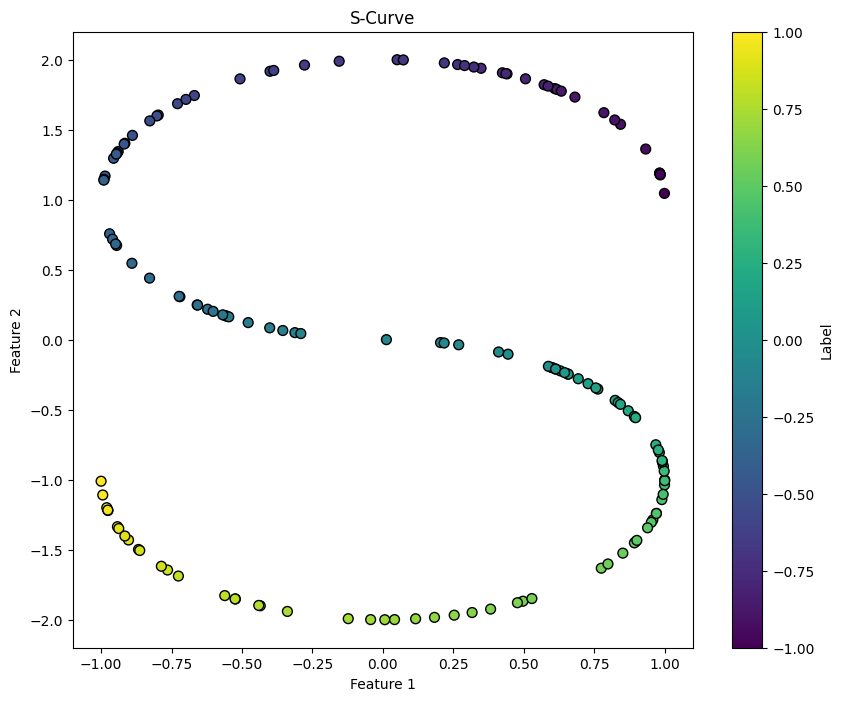

In [15]:
# Generate the data
X_train, theta_train = generate_s_curve_data(random_state=0)
X_test, theta_test = generate_s_curve_data(random_state=1)

# Create the labels
y_train = create_labels_s_curve(X_train, theta_train)
y_test = create_labels_s_curve(X_test, theta_test)

# Plot the data
plot_s_curve(X_train, y_train)

100%|██████████| 1000/1000 [00:03<00:00, 310.66it/s]


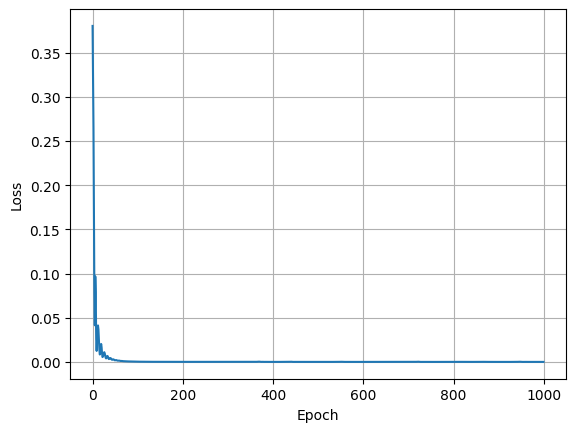

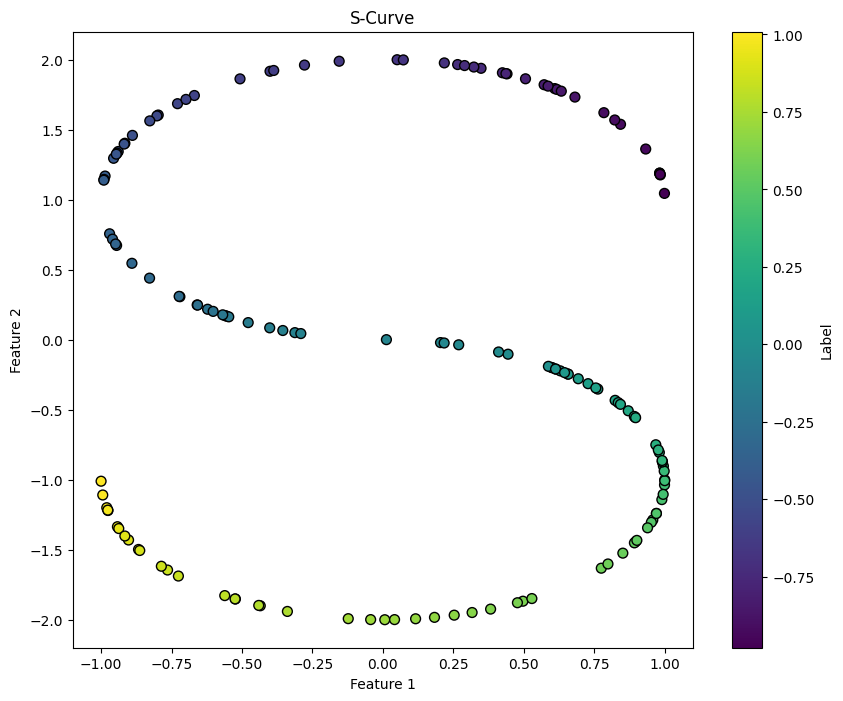

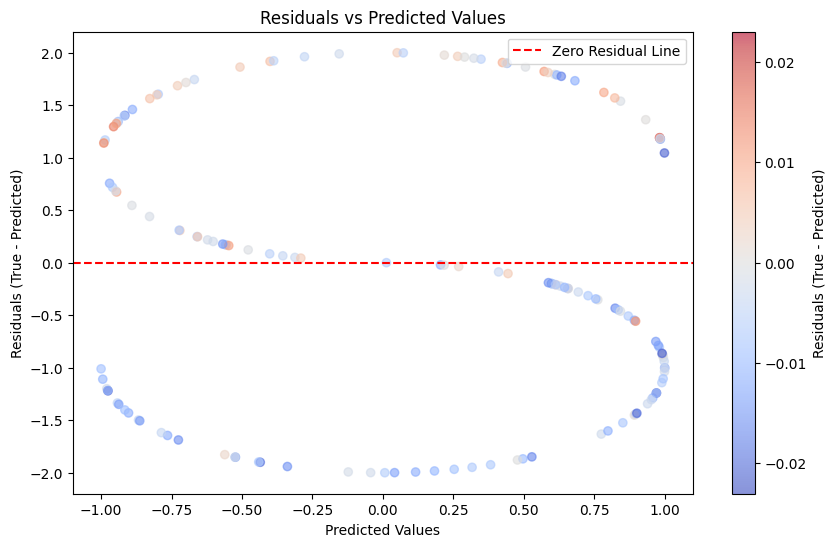

Train MSE: 0.0001, Test MSE: 0.0097


In [16]:
### Your code goes here ####
X_train, y_train = preprocess(X_train, y_train)
X_test, y_test = preprocess(X_test, y_test)
criterion = nn.MSELoss()
lr = 0.01
input_size = 2
output_size = 1
hidden_sizes = [128, 64, 32, 16]
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size)
                      ).to("cuda")
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_list = train_model(model, X_train, y_train, optimizer, criterion)
plot_loss(loss_list)
eval(model,X_train, y_train, X_test, y_test, plot_s_curve)

  **In this exercise we implement regression so the last layer of log SoftMax is not needed,and also the criterion of NLL is changed to MSE.
Adam optimizer works better than SGD in this case,and the hidden sizes were chosen after trying different values.**

## EX7

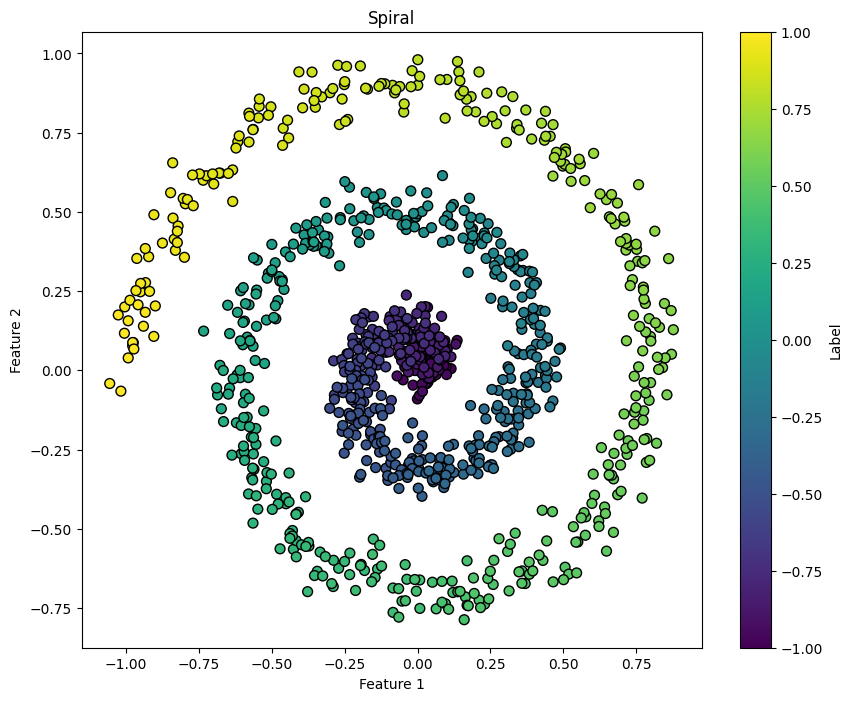

In [17]:
# Generate the data
X_train, theta_train = generate_spiral_data(random_state=0)
X_test, theta_test = generate_spiral_data(random_state=1)
# Create the labels
y_train = create_labels_spiral(theta_train)
y_test = create_labels_spiral(theta_test)
# Plot the data
plot_spiral(X_train, y_train)


100%|██████████| 1000/1000 [00:01<00:00, 539.24it/s]


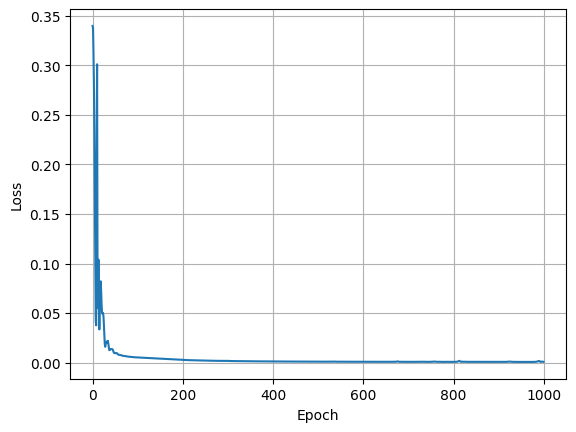

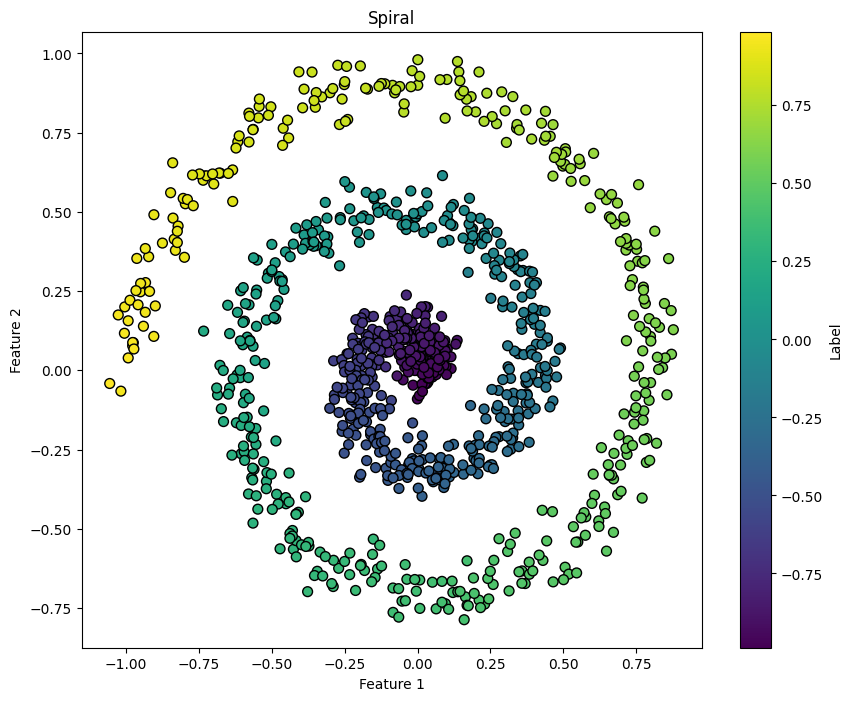

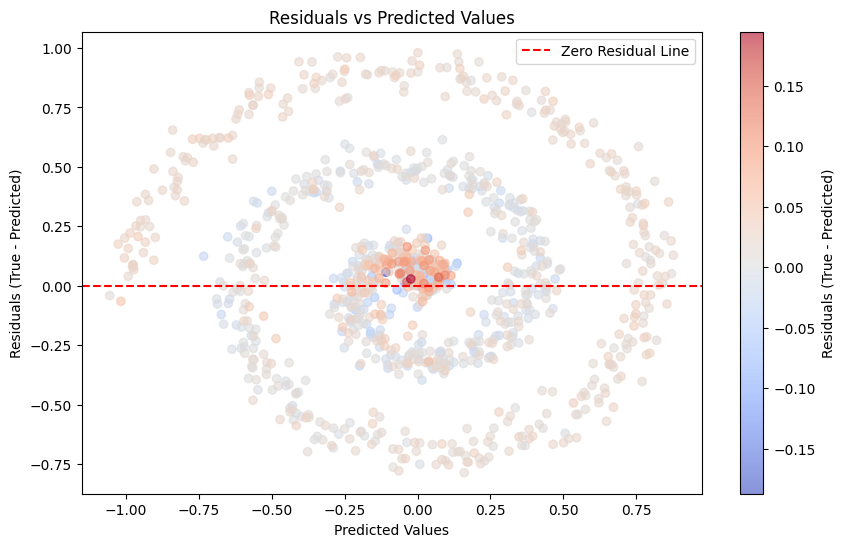

Train MSE: 0.0009, Test MSE: 0.0017


In [18]:
### Your code goes here ####
X_train, y_train = preprocess(X_train, y_train)
X_test, y_test = preprocess(X_test, y_test)
criterion = nn.MSELoss()
lr = 0.01
input_size = 2
output_size = 1
hidden_sizes = [128, 64, 64, 32]
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size)
                      ).to("cuda")
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_list = train_model(model, X_train, y_train, optimizer, criterion)
plot_loss(loss_list)
eval(model,X_train, y_train, X_test, y_test, plot_spiral)

**We used almost the exact same model,we added more parameters to the last two layers for better results.**

## EX8

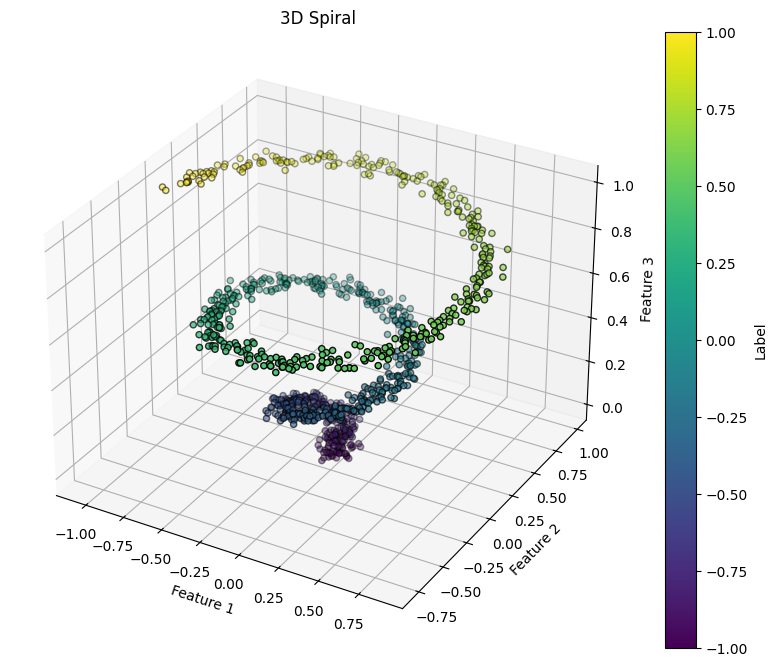

In [19]:
# Generate the data
X_train, theta_train = generate_spiral_data_3d(random_state=0)
X_test, theta_test = generate_spiral_data_3d(random_state=1)

# Create the labels
y_train = create_labels_3d_spiral(theta_train)
y_test = create_labels_3d_spiral(theta_test)

# Plot the data
plot_spiral_3d(X_train, y_train)

100%|██████████| 1000/1000 [00:01<00:00, 544.58it/s]


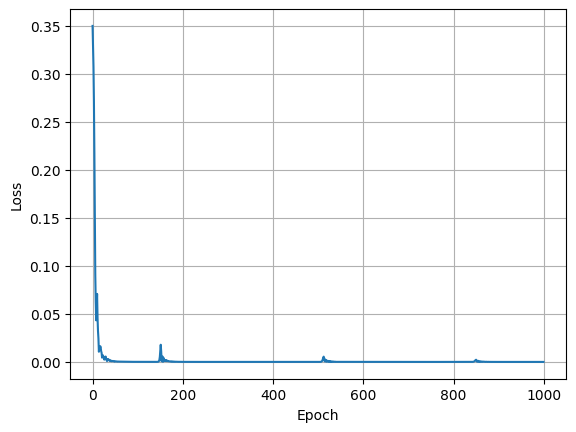

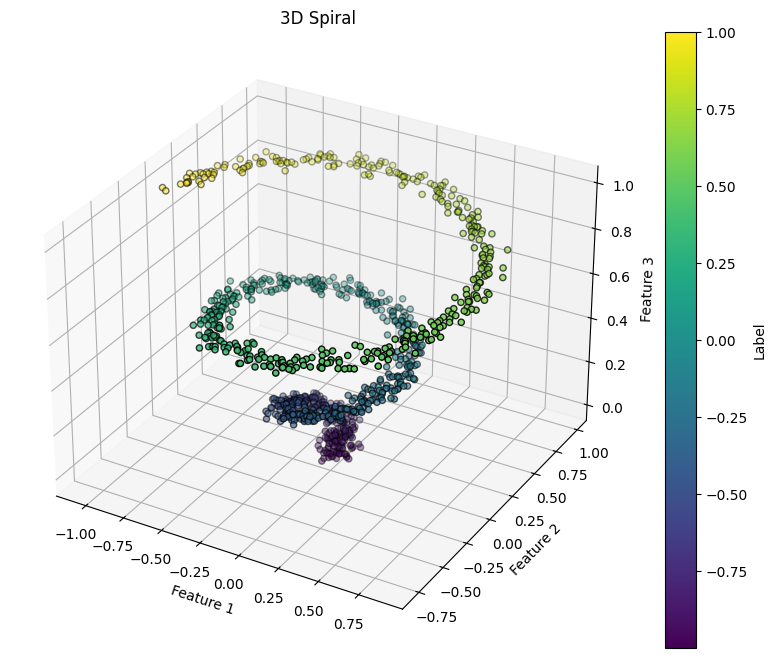

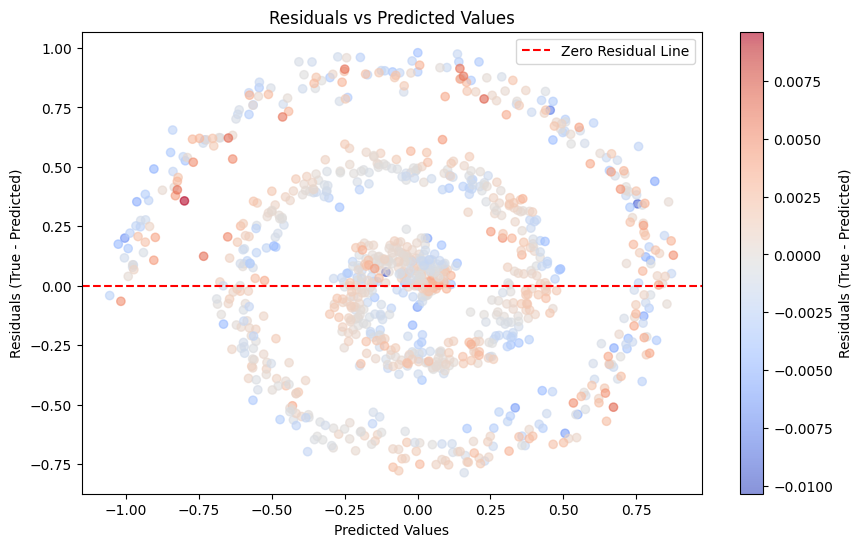

Train MSE: 0.0000, Test MSE: 0.0000


In [20]:
### Your code goes here ###
X_train, y_train = preprocess(X_train, y_train)
X_test, y_test = preprocess(X_test, y_test)
criterion = nn.MSELoss()
lr = 0.01
input_size = 3
output_size = 1
hidden_sizes = [128, 64, 64, 32]
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size)
                      ).to("cuda")
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_list = train_model(model, X_train, y_train, optimizer, criterion)
plot_loss(loss_list)
eval(model,X_train, y_train, X_test, y_test, plot_spiral_3d)

**We used almost the exact same model,and got a good results.**

# MNIST Binary Classification Task (20 pts.)
## EX9
Perform a binray classification task on the MNIST dataset between two digits (you may choose any two digits).
### You are required to do the following:
1. Create a subset of the train/test sets for the two digits you have chosen
2. Create a validation set out of the train set (80%-20% split)
3. Normalize the data
4. Write a training function
5. Write an evaluation function that returns the accuracy
6. Plot the training and validation accuracy for each epoch
7. Plot 10 test images of each class with their predicited labels
8. Print the test set accuracy

### Hyperparameters:
Briefly explain why you have chosen each parameter:
1. Model: MLP, CNN (both are valid options)
2. Number of layers, number of neurons/kernels, kernel size
3. Number of epochs (between 10-100)
4. Learning rate
5. Loss function
6. Activation function

**Grading**: Correctness and discussion. You are not grade on accuracy in this section.

### Discuss the results (3-5 lines)
Did the model converge? did it overfit? How is classifying images different from the toy examples we saw? Write you overall first impressions after solving this HW.

In [21]:
import numpy as np
import torch
from torch import nn
from torch import optim
import torchvision
from torchvision import transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, SubsetRandomSampler, random_split
from tqdm.auto import tqdm
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

batch_size = 512
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
selected_digits = [2, 5]
indices_train = [i for i, label in enumerate(trainset.targets) if label in selected_digits]
indices_test = [i for i, label in enumerate(testset.targets) if label in selected_digits]
filtered_data_train = torch.utils.data.Subset(trainset, indices_train)
filtered_data_test = torch.utils.data.Subset(testset, indices_test)

torch.manual_seed(0)
np.random.seed(0)

train_size = int(0.8 * len(filtered_data_train))
val_size = len(filtered_data_train) - train_size
train_subset, val_subset = random_split(filtered_data_train, [train_size, val_size])

trainloader = DataLoader(filtered_data_train, batch_size=batch_size, shuffle= False, num_workers=0)
testloader = DataLoader(filtered_data_test, batch_size=batch_size, shuffle=False, num_workers=2)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

classes = {"2", "5"}



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 469kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.35MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.76MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [22]:

def train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=10):
    results_dict = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }
    for epoch in tqdm(range(num_epochs), desc="Training MNIST MLP"):  # loop over the dataset multiple times
      for phase in ['train', 'val']:
          if phase == 'train':
              model.train()  # Set model to training mode
              dataloader = train_loader
          else:
              model.eval()   # Set model to evaluation mode
              dataloader = val_loader
          running_loss = 0.0
          running_corrects = 0
          total_samples = 0

          for inputs, labels in dataloader:
            labels = (labels == 5).long()
            inputs = inputs.view(inputs.shape[0], -1)
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            total_samples += labels.size(0)

          epoch_loss = running_loss / total_samples
          epoch_acc = running_corrects.double() / total_samples

          results_dict[f'{phase}_loss'].append(epoch_loss)
          results_dict[f'{phase}_acc'].append(epoch_acc.item())


    print('Finished Training')
    return results_dict;

In [23]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 2
device = "cuda"
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
model = model.to(device)
num_epochs = 10
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
results_list = train_model(model, trainloader, val_loader, optimizer, criterion, num_epochs)


Training MNIST MLP:   0%|          | 0/10 [00:00<?, ?it/s]

Finished Training


In [25]:
def plot_training_results(results_dict):
    """
    Plots the training and validation loss and accuracy stored in results_dict.

    Parameters:
    - results_dict: Dictionary containing training and validation loss and accuracy per epoch.
    """
    epochs = range(1, len(results_dict['train_loss']) + 1)

    plt.figure(figsize=(14, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, results_dict['train_loss'], label='Training Loss')
    plt.plot(epochs, results_dict['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training vs. Validation Loss')
    plt.legend()
    plt.grid()
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, results_dict['train_acc'], label='Training Accuracy')
    plt.plot(epochs, results_dict['val_acc'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training vs. Validation Accuracy')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

In [26]:
PATH = './MNIST_classification_net.pth'
torch.save(model.state_dict(), PATH)
model.load_state_dict(torch.load(PATH))

<ipython-input-26-8d42b8b26968>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(PATH))


<All keys matched successfully>

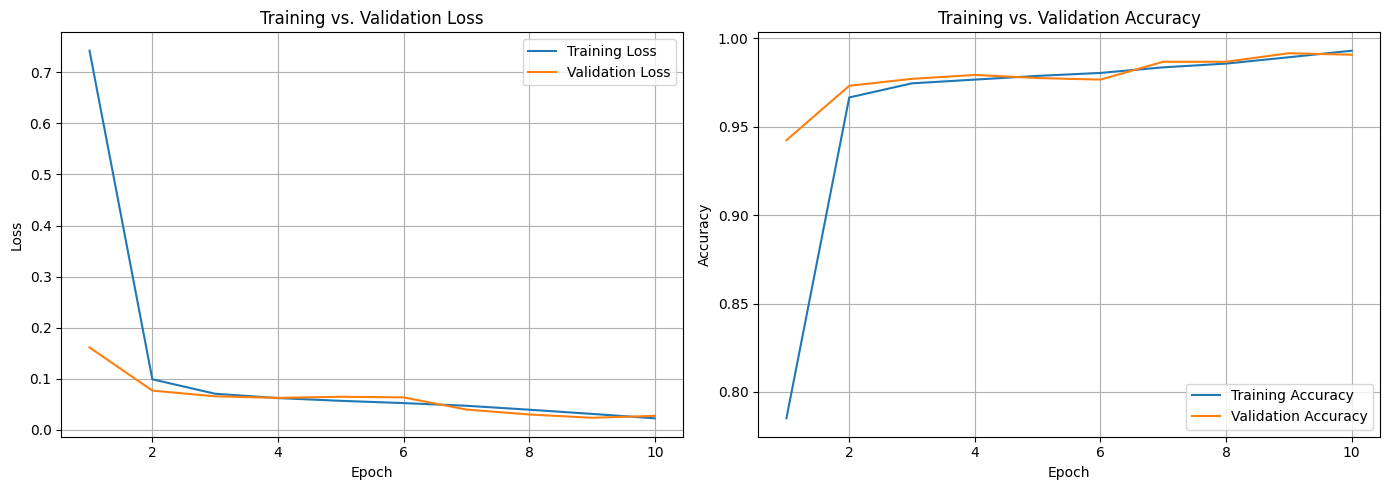

In [27]:
plot_training_results(results_list)

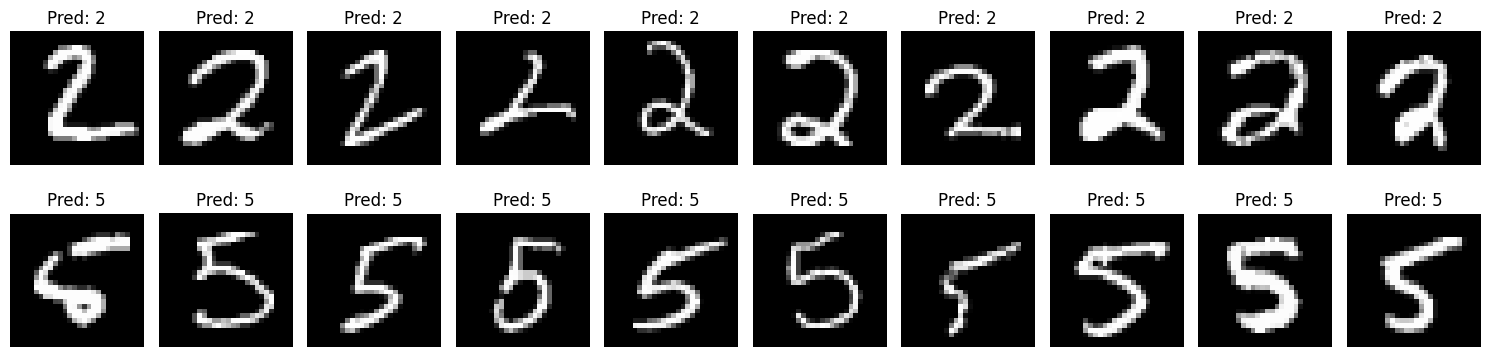

In [28]:
def testExamples(model, testloader):
  model.eval()
  class_0_images, class_1_images = [], []
  class_0_preds, class_1_preds = [], []

  # Iterate through the test dataset
  for inputs, labels in testloader:
      # Remap labels: 2 → 0, 5 → 1
      labels = (labels == 5).long()
      inputs, labels = inputs.view(inputs.size(0), -1).to(device), labels.to(device)

      # Get predictions
      with torch.no_grad():
          outputs = model(inputs)
          preds = outputs.argmax(dim=1)

      # Collect images and predictions
      for i in range(len(labels)):
          img = inputs[i].view(28, 28).cpu().numpy()  # Reshape to 28x28 for MNIST
          if labels[i].item() == 0 and len(class_0_images) < 10:
              class_0_images.append(img)
              class_0_preds.append(preds[i].item())
          elif labels[i].item() == 1 and len(class_1_images) < 10:
              class_1_images.append(img)
              class_1_preds.append(preds[i].item())

          if len(class_0_images) == 10 and len(class_1_images) == 10:
              break
      if len(class_0_images) == 10 and len(class_1_images) == 10:
          break

  # Plot the images
  fig, axes = plt.subplots(2, 10, figsize=(15, 4))

  for i in range(10):
      # Class 0 images
      axes[0, i].imshow(class_0_images[i], cmap='gray')
      axes[0, i].axis('off')
      axes[0, i].set_title(f"Pred: 2")

      # Class 1 images
      axes[1, i].imshow(class_1_images[i], cmap='gray')
      axes[1, i].axis('off')
      axes[1, i].set_title(f"Pred: 5")

  # Set row titles
  axes[0, 0].set_ylabel("Class 0", size='large')
  axes[1, 0].set_ylabel("Class 1", size='large')

  plt.tight_layout()
  plt.show()

testExamples(model, testloader)

In [29]:
def test_accuracy(model, testloader):
  correct_count, all_count = 0, 0
  for images,labels in testloader:
    labels = (labels == 5).long()
    for i in range(len(labels)):
      img = images[i].view(1, 784).to(device)
      with torch.no_grad():
          logps = model(img)

      ps = torch.exp(logps).detach().cpu().numpy()
      probab = list(ps[0])
      pred_label = probab.index(max(probab))
      true_label = labels.numpy()[i]
      if(true_label == pred_label):
        correct_count += 1
      all_count += 1

  print("Number Of Images Tested =", all_count)
  print("\nModel Accuracy =", (correct_count/all_count))

test_accuracy(model, testloader)

Number Of Images Tested = 1924

Model Accuracy = 0.988045738045738




* Parameters Selection:
  - Adam works better than SGD in this case.
  - We used Relu as our activation function in all of the exercises.
  - 10 epochs were good enough for good accuracy.
  - Those hidden sizes were selected after trying other values.

* Results Discussion: The model converged without overfitting, as shown by good test accuracy. Image classification is more challenging than toy examples due to high-dimensional, non-linear, and unstructured data.

* Overall Impression: This mission demonstrated how neural networks handle both simple regression and complex image classification tasks. It highlighted the importance of hyperparameter adjusting and the challenges of working with real-world, high-dimensional data like images.








